<a href="https://colab.research.google.com/github/salmasheila/myskill/blob/main/Klasifikasi_SVM_TGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('dataset_water_potability.csv')

# **Feature Selection**
Memilih fitur yang dibutuhkan.

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0


In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.info()
#melihat info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

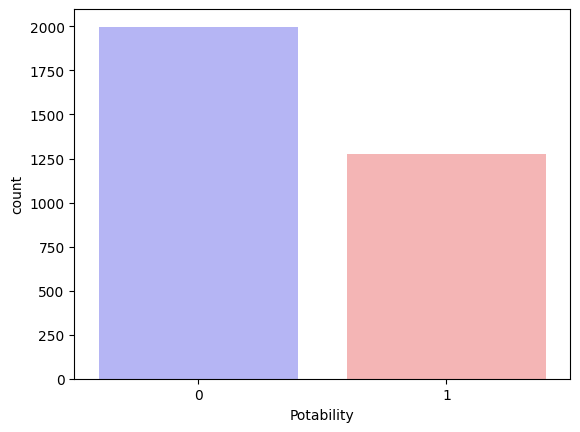

In [ ]:
sns.countplot(x="Potability", data=df, palette="bwr")
plt.show()

In [ ]:
df.isna().sum() #melihat data yang null

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:

df=df.dropna()
df.isna().sum() #mengecek kembali apakah masih ada data yang null

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [ ]:
df.isna().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

In [ ]:
# Menerapkan kondisi if, elif, else pada kolom 'KolomA'
def apply_condition(row):
    if row['Potability'] == 1:
        return 'Memenuhi syarat'
    else:
        return 'Tidak memenuhi syarat'

df['Potability'] = df.apply(apply_condition, axis=1)

# Menyimpan hasil perubahan ke file Excel baru
df.to_csv('dataset_water.csv', index=False)

<ipython-input-15-7965f2e6c0d2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Potability'] = df.apply(apply_condition, axis=1)


In [ ]:
# df = pd.read_csv('dataset_air_final.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,Tidak memenuhi syarat
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,Tidak memenuhi syarat
5,5.58,188.31,28748.69,7.54,326.68,280.47,8.40,54.92,2.56,Tidak memenuhi syarat
6,10.22,248.07,28749.72,7.51,393.66,283.65,13.79,84.60,2.67,Tidak memenuhi syarat
7,8.64,203.36,13672.09,4.56,303.31,474.61,12.36,62.80,4.40,Tidak memenuhi syarat
...,...,...,...,...,...,...,...,...,...,...
3267,8.99,215.05,15921.41,6.30,312.93,390.41,9.90,55.07,4.61,Memenuhi syarat
3268,6.70,207.32,17246.92,7.71,304.51,329.27,16.22,28.88,3.44,Memenuhi syarat
3269,11.49,94.81,37188.83,9.26,258.93,439.89,16.17,41.56,4.37,Memenuhi syarat
3270,6.07,186.66,26138.78,7.75,345.70,415.89,12.07,60.42,3.67,Memenuhi syarat


In [ ]:
df.nunique()

ph                  627
Hardness           1822
Solids             2011
Chloramines         638
Sulfate            1873
Conductivity       1938
Organic_carbon     1029
Trihalomethanes    1687
Turbidity           362
Potability            2
dtype: int64

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.086002,195.968026,21917.441243,7.134291,333.224664,426.526474,14.357683,66.400855,3.969657
std,1.573394,32.635028,8642.239802,1.584821,41.205226,80.712672,3.325022,16.077042,0.780294
min,0.230000,73.490000,320.940000,1.390000,129.000000,201.620000,2.200000,8.580000,1.450000
25%,6.090000,176.745000,15615.665000,6.140000,307.630000,366.680000,12.125000,55.955000,3.440000
50%,7.030000,197.190000,20933.510000,7.140000,332.230000,423.460000,14.320000,66.540000,3.970000
75%,8.050000,216.440000,27182.585000,8.110000,359.330000,482.370000,16.680000,77.295000,4.515000
max,14.000000,317.340000,56488.670000,13.130000,481.030000,753.340000,27.010000,124.000000,6.490000


# **Feature Encoding**
fitur mengubah numerik menjadi kategorikal

In [ ]:
ports={"Tidak memenuhi syarat":0,"Memenuhi syarat":1}
df['Potability']=df['Potability'].map(ports)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0
5,5.58,188.31,28748.69,7.54,326.68,280.47,8.40,54.92,2.56,0
6,10.22,248.07,28749.72,7.51,393.66,283.65,13.79,84.60,2.67,0
7,8.64,203.36,13672.09,4.56,303.31,474.61,12.36,62.80,4.40,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.99,215.05,15921.41,6.30,312.93,390.41,9.90,55.07,4.61,1
3268,6.70,207.32,17246.92,7.71,304.51,329.27,16.22,28.88,3.44,1
3269,11.49,94.81,37188.83,9.26,258.93,439.89,16.17,41.56,4.37,1
3270,6.07,186.66,26138.78,7.75,345.70,415.89,12.07,60.42,3.67,1


# **Feature Scaling**
fitur untuk normalisasi

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0
5,5.58,188.31,28748.69,7.54,326.68,280.47,8.40,54.92,2.56,0
6,10.22,248.07,28749.72,7.51,393.66,283.65,13.79,84.60,2.67,0
7,8.64,203.36,13672.09,4.56,303.31,474.61,12.36,62.80,4.40,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.99,215.05,15921.41,6.30,312.93,390.41,9.90,55.07,4.61,1
3268,6.70,207.32,17246.92,7.71,304.51,329.27,16.22,28.88,3.44,1
3269,11.49,94.81,37188.83,9.26,258.93,439.89,16.17,41.56,4.37,1
3270,6.07,186.66,26138.78,7.75,345.70,415.89,12.07,60.42,3.67,1


In [ ]:
numerical = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target =['Potability']

In [ ]:
numerical

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=StandardScaler()
df[numerical]=scaler.fit_transform(df[numerical].values)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,0.784486,0.564012,0.011687,0.584254,0.574471,-0.783919,1.228062,2.111557,0.846486,0
4,1.273995,-0.455698,-0.455834,-0.368771,-0.560376,-0.348439,-0.841612,-2.140282,0.141447,0
5,-0.957406,-0.234715,0.790645,0.256060,-0.158870,-1.810035,-1.792218,-0.714293,-1.807022,0
6,1.992367,1.596902,0.790765,0.237126,1.467056,-1.770627,-0.170773,1.132277,-1.666014,0
7,0.987918,0.226561,-0.954313,-1.624746,-0.726173,0.595885,-0.600952,-0.224031,0.551652,0
...,...,...,...,...,...,...,...,...,...,...
3267,1.210423,0.584854,-0.693978,-0.526557,-0.492649,-0.447581,-1.340981,-0.704960,0.820848,1
3268,-0.245392,0.347933,-0.540564,0.363354,-0.697043,-1.205271,0.560231,-2.334396,-0.678961,1
3269,2.799740,-3.100447,1.767503,1.341626,-1.803488,0.165610,0.545190,-1.545498,0.513195,1
3270,-0.645900,-0.285287,0.488576,0.388600,0.302836,-0.131815,-0.688191,-0.372105,-0.384126,1


# **Split data**
fitur untuk membagi data traning dan testing

In [ ]:
X = df.drop(['Potability'], axis=1)
Y = df['Potability']
X.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [ ]:
# Bagi dataset menjadi data latih dan data uji
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)


In [ ]:
X_train.shape, X_test.shape

((1608, 9), (403, 9))

In [ ]:
Y_train.shape,Y_test.shape

((1608,), (403,))

In [ ]:
#create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(9,))
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.Huber(),
              metrics =['mse'])
# Latih model dengan data train
historytrain = model.fit(X_train, Y_train, epochs=100)


# Evaluasi model pada data test
loss = model.evaluate(X_train, Y_train)
print("Test Loss:", loss)



Epoch 1/100
51/51 [==============================] - 1s 2ms/step - loss: 0.5768 - mse: 1.4479
Epoch 2/100
51/51 [==============================] - 0s 1ms/step - loss: 0.5021 - mse: 1.2061
Epoch 3/100
51/51 [==============================] - 0s 1ms/step - loss: 0.4334 - mse: 1.0014
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 0.3722 - mse: 0.8298
Epoch 5/100
51/51 [==============================] - 0s 1ms/step - loss: 0.3180 - mse: 0.6875
Epoch 6/100
51/51 [==============================] - 0s 964us/step - loss: 0.2728 - mse: 0.5760
Epoch 7/100
51/51 [==============================] - 0s 1ms/step - loss: 0.2352 - mse: 0.4865
Epoch 8/100
51/51 [==============================] - 0s 977us/step - loss: 0.2046 - mse: 0.4172
Epoch 9/100
51/51 [==============================] - 0s 2ms/step - loss: 0.1809 - mse: 0.3654
Epoch 10/100
51/51 [==============================] - 0s 946us/step - loss: 0.1631 - mse: 0.3278
Epoch 11/100
51/51 [==============================] -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historytest = model.fit(X_test, Y_test, epochs=100)
loss = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1210 - mse: 0.2420
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1206 - mse: 0.2411
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 0.2403
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1199 - mse: 0.2397
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.2393
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1194 - mse: 0.2387
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.2384
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1192 - mse: 0.2384
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.2381
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.2381
Epoch 11/100
13/13 [==============================] - 0s 2m

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


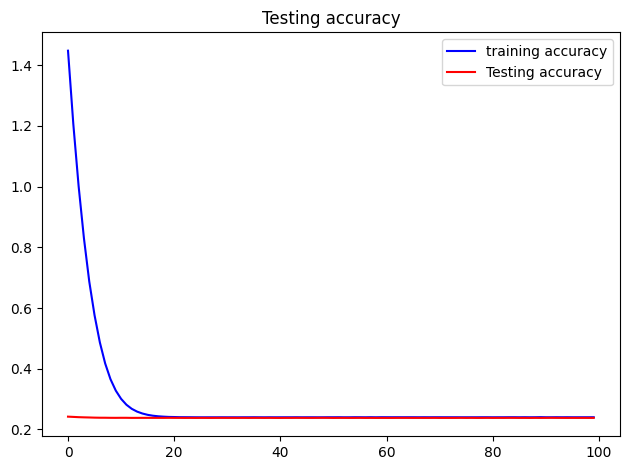

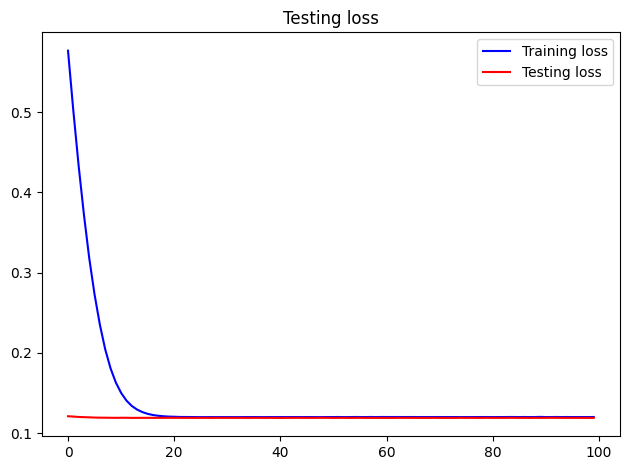

In [ ]:
# from keras.callbacks import History
import matplotlib.pyplot as plt

acctrain = historytrain.history['mse']
acctest = historytest.history['mse']
losstrain = historytrain.history['loss']
losstest = historytest.history['loss']

epochsacctrain = range(len(acctrain))
epochslosstrain = range(len(losstrain))
epochsacctest = range(len(acctest))
epochslosstest = range(len(losstest))

plt.plot(epochsacctrain, acctrain, 'b', label='training accuracy')
plt.title('Training accuracy')

plt.plot(epochsacctest, acctest, 'r', label='Testing accuracy')
plt.title('Testing accuracy')
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(epochslosstrain, losstrain, 'b', label='Training loss')
plt.title('Training loss')

plt.plot(epochslosstest, losstest, 'r', label='Testing loss')
plt.title('Testing loss')
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
model.save("model_klasifikasi_air.h5")

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('dataset_water.csv')
X = df.drop(['Potability'],axis=1)
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63
1,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08
2,5.58,188.31,28748.69,7.54,326.68,280.47,8.40,54.92,2.56
3,10.22,248.07,28749.72,7.51,393.66,283.65,13.79,84.60,2.67
4,8.64,203.36,13672.09,4.56,303.31,474.61,12.36,62.80,4.40
...,...,...,...,...,...,...,...,...,...
2006,8.99,215.05,15921.41,6.30,312.93,390.41,9.90,55.07,4.61
2007,6.70,207.32,17246.92,7.71,304.51,329.27,16.22,28.88,3.44
2008,11.49,94.81,37188.83,9.26,258.93,439.89,16.17,41.56,4.37
2009,6.07,186.66,26138.78,7.75,345.70,415.89,12.07,60.42,3.67


In [ ]:
x = np.array([X])
x.shape

(1, 2011, 9)

In [ ]:
data_tes=x[0][12]
data_tes=np.expand_dims(data_tes, axis=0)
data_tes

array([[5.400000e+00, 1.407400e+02, 1.726659e+04, 1.006000e+01,
        3.283600e+02, 4.728700e+02, 1.126000e+01, 5.693000e+01,
        4.820000e+00]])

In [ ]:
result = model.predict(data_tes)
result

1/1 [==============================] - 0s 52ms/step


array([[41.269394]], dtype=float32)

In [ ]:
class_names = ["Tidak Memenuhi Syarat", "Memenuhi Syarat"]

# Perform the prediction
prediction = model.predict(data_tes)

# Get the index of the predicted class label
predicted_index = np.argmax(prediction)

# Get the corresponding class label from the class_names list
predicted_label = class_names[predicted_index]

print(predicted_label)

1/1 [==============================] - 0s 19ms/step
Tidak Memenuhi Syarat


In [ ]:
!pip freeze > requirementswater.txt

In [ ]:
Y_test

3132    1
2335    1
131     0
1017    0
2507    0
       ..
2619    0
503     0
960     0
250     1
1097    1
Name: Potability, Length: 403, dtype: int64

In [ ]:
encoding_mapping = {0: 'Tidak Memenuhi Syarat', 1: 'Memenuhi Syarat'}

# Mengonversi nilai encoding menjadi label kategorikal
Y_test = [encoding_mapping[label] for label in Y_test]

# Menampilkan hasil prediksi kategorikal
print(Y_test)
# Menyimpan hasil perubahan ke file Excel baru
df.to_csv('dataset_Ytest.csv', index=False)

['Memenuhi Syarat', 'Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Memenuhi Syarat', 'Memenuhi Syarat', 'Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Memenuhi Syarat', 'Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Memenuhi Syarat', 'Memenuhi Syarat', '

In [ ]:
Y_pre = model.predict(X_test)
Y_prediction = []

for i in range(len(Y_pre)):
  prediction = np.argmax(Y_pre[i])
  Y_prediction.append(prediction)

# Menggunakan mapping antara nilai encoding dan label kategorikal
encoding_mapping = {0: 'Tidak Memenuhi Syarat', 1: 'Memenuhi Syarat'}

# Mengonversi nilai encoding menjadi label kategorikal
Y_prediction = [encoding_mapping[label] for label in Y_prediction]

# Menampilkan hasil prediksi kategorikal
print(Y_prediction)
# Menyimpan hasil perubahan ke file Excel baru
df.to_csv('dataset_Ypred.csv', index=False)

13/13 [==============================] - 0s 1ms/step
['Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syarat', 'Tidak Memenuhi Syara

In [ ]:
correct_predictions = 0
for true_label, pred_label in zip(Y_test, Y_prediction):
    if true_label == pred_label:
        correct_predictions += 1

# Menghitung jumlah total data
total_data = len(Y_test)

# Menghitung akurasi
accuracy = correct_predictions / total_data

print("Akurasi:", accuracy)

Akurasi: 0.5955334987593052


[[  0 163]
 [  0 240]]


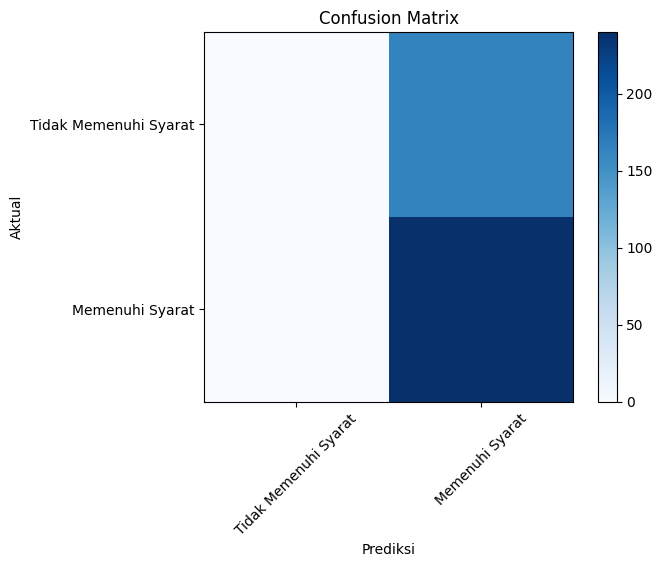

In [ ]:
from sklearn.metrics import confusion_matrix
labels = ['Tidak Memenuhi Syarat','Memenuhi Syarat']
cm = confusion_matrix(Y_test, Y_prediction)
# Menampilkan confusion matrix
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_prediction))

                       precision    recall  f1-score   support

      Memenuhi Syarat       0.00      0.00      0.00       163
Tidak Memenuhi Syarat       0.60      1.00      0.75       240

             accuracy                           0.60       403
            macro avg       0.30      0.50      0.37       403
         weighted avg       0.35      0.60      0.44       403



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
